# Project 2- COSC 311
## Author: Sarah Chambers


### TASK 1: Clustering for Wireless Indoor Localization 

1a.) Use first 7 columns of this dataset to conduct k-means clustering (k = 4), output the center of each cluster.
1b.) Use the last column (room number) as the ground truth to match each cluster with its label (room number), calculate the output the clustering accuracy (show how many samples are correctly classified), and show the corresponding confusion matrix as a figure.
1c.) Calculate and output the clustering algorithm of each room (i.e. out of all the samples for EACH room, how many samples are correctly clustered).

[[-62.482      -56.312      -60.566      -64.204      -70.278
  -82.956      -84.072     ]
 [-49.17102967 -55.15881326 -53.29144852 -50.03839442 -64.04537522
  -80.94240838 -81.85340314]
 [-35.43058824 -55.93411765 -55.72470588 -36.69411765 -67.32235294
  -71.59294118 -72.56941176]
 [-60.13346614 -55.20517928 -50.64940239 -61.28286853 -49.46613546
  -87.02191235 -86.99800797]]
Clustering accuracy: 0.9545
Confusion matrix:
 [[496   0   4   0]
 [  0 425  75   0]
 [  2   0 492   6]
 [  2   0   2 496]]


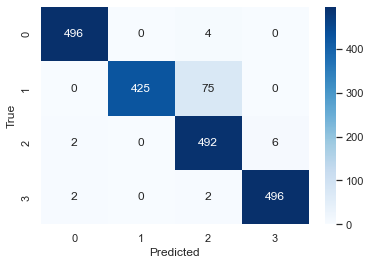

Clustering accuracy: 0.9275
Room 1 clustering accuracy: 0.89
Room 2 clustering accuracy: 0.90
Room 3 clustering accuracy: 0.93
Room 4 clustering accuracy: 0.99


In [5]:
# Import all of my libraries
%matplotlib inline
from scipy.stats import mode
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# Load Wireless Indoor Localization data into a DataFrame
wifi = pd.read_csv('wifi_localization.txt', header=None, delimiter='\t')

# Use the first 7 columns as features
X = wifi.iloc[:, :7]

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)

# Output the center of each cluster
centers = kmeans.cluster_centers_
print(centers)

# Load Wireless Indoor Localization data into a DataFrame
wifi = pd.read_csv('wifi_localization.txt', header=None, delimiter='\t')

# Use the first 7 columns as features
X = wifi.iloc[:, :7]

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)

# Match each cluster with its label
labels = np.zeros_like(y_kmeans)
for i in range(4):
    mask = (y_kmeans == i)
    labels[mask] = mode(wifi.iloc[:, -1][mask])[0]

# Calculate clustering accuracy and confusion matrix
accuracy = accuracy_score(wifi.iloc[:, -1], labels)
cm = confusion_matrix(wifi.iloc[:, -1], labels)

# Output the clustering accuracy and confusion matrix
print('Clustering accuracy:', accuracy)
print('Confusion matrix:\n', cm)

# Plot the confusion matrix as a figure
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

# Match each cluster with its label
labels = np.zeros_like(y_kmeans)
for i in range(4):
    mask = (y_kmeans == i)
    labels[mask] = np.bincount(wifi.iloc[:, -1][mask]).argmax()

# Calculate clustering accuracy
accuracy = accuracy_score(wifi.iloc[:, -1], labels)
print('Clustering accuracy:', accuracy)

# Calculate and print the accuracy for each room
for i in range(1, 5):
    mask = (wifi.iloc[:, -1] == i)
    room_accuracy = accuracy_score(wifi.iloc[:, -1][mask], labels[mask])
    print(f'Room {i} clustering accuracy: {room_accuracy:.2f}')

### TASK 2: PCA Based Hand-Written Digits Classifacation

2a.) Conduct PCA analysis on the dataset and find out how many principal components are needed to keep at least 90% 
variance (i.e. the ratio of variance loss, η, is less than 10%).
2b.) Assume m principal components are needed to keep at least 90% variance, transform the dataset from 64 
dimensions to m dimensions.
2c.) Based on the above dimension-reduced dataset, build a classification model (any algorithm) with optimized 
parameters to do cross-validation test (CVT) (fold = 10), show the CVT accuracy and corresponding confusion matrix 
(in a figure).

Number of principal components to keep at least 90% variance: 31
Best parameters: {'svm__C': 10, 'svm__kernel': 'rbf'}
CVT accuracy: 0.9812


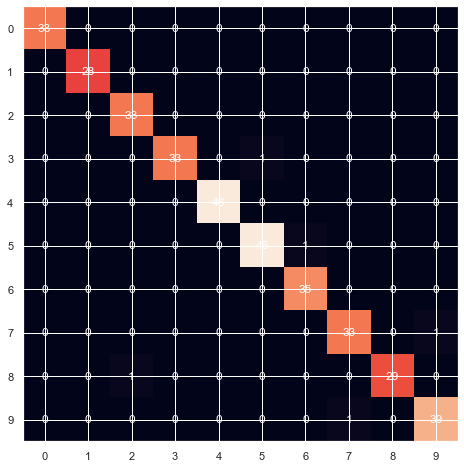

In [3]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform PCA to determine the number of principal components needed to keep at least 90% of the variance
pca = PCA()
pca.fit(X_train_scaled)
variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(variance_ratio_cumsum >= 0.9) + 1
print(f"Number of principal components to keep at least 90% variance: {n_components}")

# Transform the training and testing data using the selected number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(scaler.transform(X_test))

# Build a classification model using the transformed data
model = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=n_components)),
    ("svm", SVC())
])

# Optimize the parameters of the classification model using cross-validation
param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__kernel": ["linear", "rbf"]
}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"CVT accuracy: {grid_search.best_score_:.4f}")

# Calculate and plot the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = grid_search.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat)
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(range(10))
ax.set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        ax.text(j, i, conf_mat[i, j], ha="center", va="center", color="white")
plt.show()

### TASK 3: Regression Model for Median House Value Prediction

3a.) Assume the “median_house_value” is related to the following attributes in this dataset: “housing_median_age”, 
“total_rooms”, “total_bedrooms”, “population”, and “median_income”, use correlation coefficient analysis to select 
3 attributes that have higher correlation with the target variable (i.e. “median_house_value”).
3b.) Randomly split all the samples (each sample include the 3 selected attributes and one target variable) into 
two parts: 60% for training and 40% for testing.
3c.) Use training data to build a Multiple Linear Regression model and test it using the testing data. 
Show the performance of the regression model, including MAE, MSE, and RMSE.

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the Housing Dataset
housing = pd.read_csv("housing.csv")

# Select the attributes to be used in correlation coefficient analysis
selected_attrs = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "median_income"]

# Compute the correlation coefficients between the selected attributes and the target variable
corr_coeffs = housing[selected_attrs + ["median_house_value"]].corr()["median_house_value"].sort_values(ascending=False)

# Select the top 3 attributes with highest correlation coefficients
top3_attrs = corr_coeffs[1:4].index.tolist()

# Split the data into training and testing sets
train_size = 0.6
train_index = np.random.rand(len(housing)) < train_size
train_data = housing.loc[train_index, top3_attrs + ["median_house_value"]]
test_data = housing.loc[~train_index, top3_attrs + ["median_house_value"]]

# Train a multiple linear regression model using the training data
reg = LinearRegression().fit(train_data[top3_attrs], train_data["median_house_value"])

# Test the model using the testing data
y_pred = reg.predict(test_data[top3_attrs])

# Compute the evaluation metrics
mae = mean_absolute_error(test_data["median_house_value"], y_pred)
mse = mean_squared_error(test_data["median_house_value"], y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics w/ 2 decimal places
print("Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Evaluation Metrics:
MAE: 60099.77
MSE: 6558828280.08
RMSE: 80986.59
